In [2]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import datetime

In [2]:
# Load in datasets
# Conversation information
df = pd.read_csv('ALL_CONVERSATIONS_WRANGLED.csv')
print('Conversation information:')
#display(df.head())

Conversation information:


In [3]:
conn = sqlite3.connect('ALL_DATA_32_FEATURES.db')
created_df = pd.read_sql("SELECT created_at, id_str, [('user', 'id_str')] FROM tweets", conn)

In [4]:
klm_created_df = created_df[created_df["('user', 'id_str')"] == str(18332190)]
klm_created_df.shape

(151211, 3)

In [6]:
all_responses = []
customer_tweets = []
count = 0
for convo in df[df['airlines_involved'] == "['British_Airways']"]['raw_tweets_info']:
    previous_tweet = 'Not Set'
    for tweet in eval(convo)[::-1]:
        if int(tweet[1]) == 18332190:
            if previous_tweet != 'Not Set':
                customer_tweets.append(int(previous_tweet[0]))
                response = (previous_tweet[0], tweet[0])
                all_responses.append(response)
            else:
                #print(convo)
                count += 1
        previous_tweet = tweet

print(count)
print(len(all_responses))

18375
61654


In [7]:
created_df = created_df.fillna("")
custumer_created_df = created_df[created_df['id_str'].astype('int64').isin(customer_tweets)]

In [8]:
custumer_created_df.shape

(61678, 3)

In [9]:
timedeltas = []

count = 0
# errcounts = 0
for response in all_responses:
    count += 1
    if count % 1000 == 0:
        print(count)
    try: 
        tweet_date = custumer_created_df[custumer_created_df['id_str'] == str(response[0])].iloc[0]['created_at']
        response_date = klm_created_df[klm_created_df['id_str'] == str(response[1])].iloc[0]['created_at']
        tweet_time = datetime.datetime.strptime(tweet_date, '%a %b %d %H:%M:%S +0000 %Y')
        response_time = datetime.datetime.strptime(response_date, '%a %b %d %H:%M:%S +0000 %Y')
        time_delta = response_time - tweet_time
        timedeltas.append(time_delta)
    except IndexError:
        print('error')
        


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
error
20000
21000
22000
23000
24000
error
25000
26000
error
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000


In [11]:
sumtime = 0
listseconds = []
for td in timedeltas:
    sumtime = sumtime + td.seconds
    listseconds.append(td.seconds)

meantime_seconds = sumtime/len(timedeltas)
meantime_seconds

16792.156396489918

In [18]:
import csv
with open('reponsetime_britishairways.csv', 'w', newline='') as sdf:
    csvwriter = csv.writer(sdf)
    for row in listseconds:
        csvwriter.writerow([row,])

In [88]:
import matplotlib.pyplot as plt

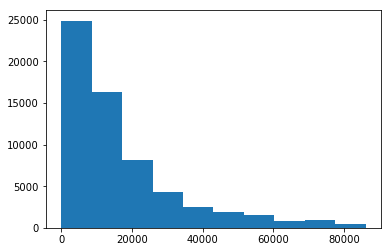

In [12]:
plt.hist(listseconds)
plt.show()

In [20]:
sum(listseconds) / len(listseconds)

16792.156396489918

In [3]:
import csv
import matplotlib.pyplot as plt

In [24]:
dates_ba = pd.read_csv('reponsetime_britishairways.csv', names=['date'])
dates_klm = pd.DataFrame({'date' : np.load('klm_tweets.npy')})
dates_ba['date'] = dates_ba['date']/ 60
dates_klm['date'] = dates_klm['date']/ 60

In [25]:
print(dates_ba['date'].mean())
print(dates_klm['date'].mean())

279.8692732748298
60.43066766386888


In [31]:
dates_ba['date'].plot(kind='density')
dates_klm['date'].plot(kind='density')
plt.legend(['British Airways', 'KLM'])
plt.xlim((0,600))
plt.ylim((0,0.015))
plt.title('Response Time per Airline')
plt.xlabel('Response Time (in minutes)')
plt.savefig('Response-Time.png' ,dpi=300)